In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 데이터 입력 (mm 단위로 변환)
import pandas as pd

df = pd.read_excel('Bench.xlsx',sheet_name='velocity')
df

,vertical,-0.0089,-0.006675,-0.00445,-0.002225,0,0.002225,0.00445,0.006675,0.0089
0,0.000000,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670
1,0.008316,0.000676,0.000679,0.000681,0.000683,0.000684,0.000683,0.000681,0.000679,0.000676
2,0.016632,0.000682,0.000686,0.000690,0.000693,0.000694,0.000693,0.000690,0.000686,0.000682
3,0.024948,0.000687,0.000691,0.000696,0.000699,0.000700,0.000699,0.000696,0.000691,0.000687
4,0.033264,0.000691,0.000696,0.000700,0.000703,0.000705,0.000703,0.000700,0.000696,0.000691
5,0.041580,0.000694,0.000699,0.000704,0.000707,0.000708,0.000707,0.000704,0.000699,0.000694
6,0.049896,0.000698,0.000703,0.000707,0.000709,0.000710,0.000709,0.000707,0.000703,0.000698
7,0.058212,0.000700,0.000705,0.000709,0.000712,0.000713,0.000712,0.000709,0.000705,0.000700
8,0.066528,0.000703,0.000708,0.000711,0.000714,0.000714,0.000714,0.000711,0.000708,0.000703
9,0.074844,0.000705,0.000710,0.000713,0.000715,0.000716,0.000715,0.000713,0.000710,0.000705


In [2]:
vertical = df['vertical'].to_numpy()
horizontal = pd.Series(df.columns[1:].astype(float)).to_numpy()
# df의 각 열(온도 데이터)을 meshgrid 형태로 변환
temperature = df.iloc[:, 1:].to_numpy()

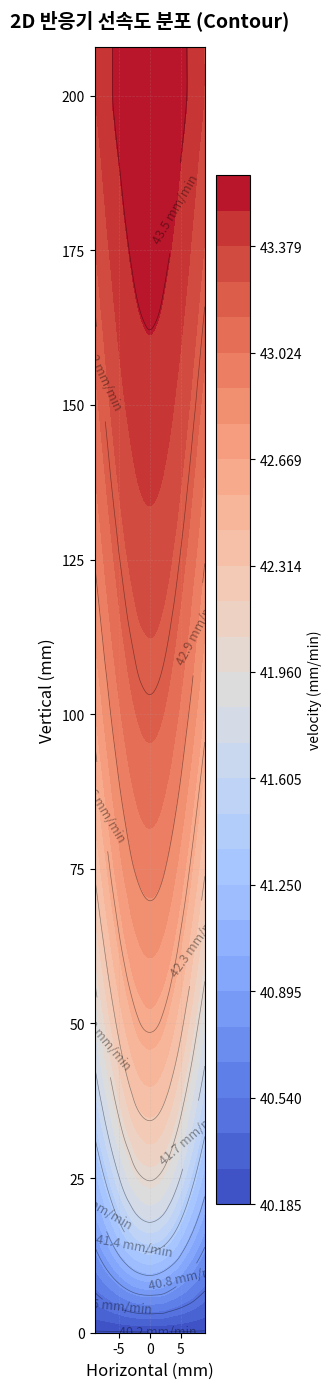

In [3]:
# vertical, horizontal, temperature 변수에 맞게 코드 수정
# 단위가 m/s이므로 mm/min으로 변환 (1000 * 60 곱하기)
vertical_mm = vertical * 1000
horizontal_mm = horizontal * 1000

# 속도 데이터(temperature)는 m/s → mm/min으로 변환
velocity_mm_min = temperature * 1000 * 60

# 메쉬그리드 생성 (horizontal: x축, vertical: y축, 단위 mm)
X, Y = np.meshgrid(horizontal_mm, vertical_mm)

# 고해상도 보간용 그리드 생성 (단위 mm)
horizontal_fine = np.linspace(horizontal_mm.min(), horizontal_mm.max(), 200)
vertical_fine = np.linspace(vertical_mm.min(), vertical_mm.max(), 500)
X_fine, Y_fine = np.meshgrid(horizontal_fine, vertical_fine)

# 원본 데이터 포인트 (각 위치에 대한 속도값, 단위 mm)
points = np.array([(x, y) for y in vertical_mm for x in horizontal_mm])
values = velocity_mm_min.flatten()

# cubic 보간으로 부드러운 속도 데이터 생성
velocity_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

# 플롯 생성 (세로로 긴 반응기 형상)
fig, ax = plt.subplots(figsize=(6, 14))

# 등고선 플롯
levels = np.linspace(np.nanmin(velocity_fine), np.nanmax(velocity_fine), 30)
contourf = ax.contourf(X_fine, Y_fine, velocity_fine, levels=levels, cmap='coolwarm')
contour = ax.contour(X_fine, Y_fine, velocity_fine, levels=12, colors='black', 
                    linewidths=0.5, alpha=0.4)
ax.clabel(contour, inline=True, fontsize=9, fmt='%.1f mm/min')

ax.set_xlabel('Horizontal (mm)', fontsize=12)
ax.set_ylabel('Vertical (mm)', fontsize=12)
ax.set_title('2D 반응기 선속도 분포 (Contour)', fontsize=14, fontweight='bold', pad=15)
ax.set_aspect('equal')

# 컬러바 추가
cbar = plt.colorbar(contourf, ax=ax, label='velocity (mm/min)', pad=0.02, shrink=0.8, aspect=30)
cbar.ax.tick_params(labelsize=10)

# 그리드 추가
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [4]:
# 그래프를 파일로 저장 (예: 'temperature_contour.png')
fig.savefig('velocity_contour.png', dpi=300, bbox_inches='tight')
